In [3]:
import numpy as np
from sklearn import svm
! pip install modAL
from sklearn.metrics import accuracy_score
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling, margin_sampling, entropy_sampling
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Strategy 1, Query 1 - Training Accuracy: 0.648 - Testing Accuracy: 0.711
Strategy 2, Query 1 - Training Accuracy: 0.648 - Testing Accuracy: 0.711
Strategy 3, Query 1 - Training Accuracy: 0.648 - Testing Accuracy: 0.711
Strategy 1, Query 2 - Training Accuracy: 0.648 - Testing Accuracy: 0.711
Strategy 2, Query 2 - Training Accuracy: 0.467 - Testing Accuracy: 0.511
Strategy 3, Query 2 - Training Accuracy: 0.648 - Testing Accuracy: 0.711
Strategy 1, Query 3 - Training Accuracy: 0.638 - Testing Accuracy: 0.711
Strategy 2, Query 3 - Training Accuracy: 0.371 - Testing Accuracy: 0.356
Strategy 3, Query 3 - Training Accuracy: 0.648 - Testing Accuracy: 0.711
Strategy 1, Query 4 - Training Accuracy: 0.638 - Testing Accuracy: 0.711
Strategy 2, Query 4 - Training Accuracy: 0.448 - Testing Accuracy: 0.333
Strategy 3, Query 4 - Training Accuracy: 0.648 - Testing Accuracy: 0.711
Strategy 1, Query 5 - Training Accuracy: 0.638 - Testing Accuracy: 0.711
Strategy 2, Query 5 - Training Accuracy: 0.724 - Te

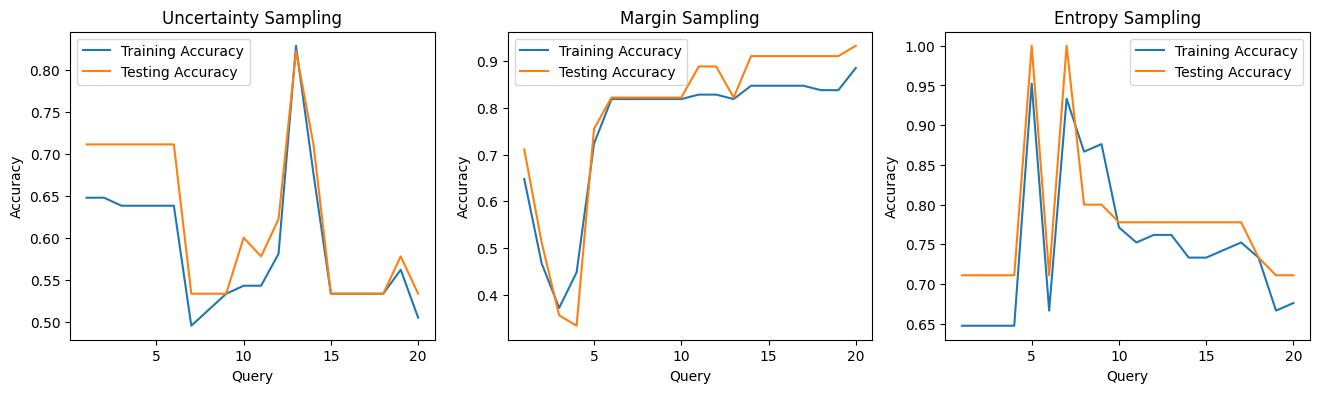

In [4]:


# load iris dataset
iris = load_iris()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# set up the initial training data
n_initial = 5
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]

# initialize the learner and the query strategies
classifier =SVC(probability=True)
query_strategies = [uncertainty_sampling, margin_sampling, entropy_sampling]
learners = [ActiveLearner(estimator=classifier, X_training=X_initial, y_training=y_initial, query_strategy=strategy) 
            for strategy in query_strategies]

# set the number of queries
n_queries = 20

# initialize the lists to store the accuracies for each query and strategy
acc_train = [[] for _ in query_strategies]
acc_test = [[] for _ in query_strategies]

# run the active learning loop
for idx in range(n_queries):

    for i, learner in enumerate(learners):
        
        # query the unlabeled data
        query_idx, _ = learner.query(X_train)

        # get the corresponding samples
        X_pool, y_pool = X_train[query_idx], y_train[query_idx]

        # teach the learner with the selected samples
        learner.teach(X_pool, y_pool)

        # calculate and store the accuracies for each strategy
        acc_train[i].append(accuracy_score(learner.predict(X_train), y_train))
        acc_test[i].append(accuracy_score(learner.predict(X_test), y_test))
        
        # Print training and testing accuracies for each query
        train_accuracy = accuracy_score(learner.predict(X_train), y_train)
        test_accuracy = accuracy_score(learner.predict(X_test), y_test)
        print(f"Strategy {i+1}, Query {idx+1} - Training Accuracy: {train_accuracy:.3f} - Testing Accuracy: {test_accuracy:.3f}")
import matplotlib.pyplot as plt

# plot the training and testing accuracy for each query and strategy
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].set_title('Uncertainty Sampling')
ax[1].set_title('Margin Sampling')
ax[2].set_title('Entropy Sampling')

for i in range(3):
    ax[i].plot(range(1, n_queries+1), acc_train[i], label='Training Accuracy')
    ax[i].plot(range(1, n_queries+1), acc_test[i], label='Testing Accuracy')
    ax[i].set_xlabel('Query')
    ax[i].set_ylabel('Accuracy')
    ax[i].legend()
    
plt.show()



Strategy 1, Query 1 - Training Accuracy: 0.827 - Testing Accuracy: 0.825
Strategy 2, Query 1 - Training Accuracy: 0.869 - Testing Accuracy: 0.889
Strategy 3, Query 1 - Training Accuracy: 0.784 - Testing Accuracy: 0.784
Strategy 1, Query 2 - Training Accuracy: 0.852 - Testing Accuracy: 0.860
Strategy 2, Query 2 - Training Accuracy: 0.849 - Testing Accuracy: 0.860
Strategy 3, Query 2 - Training Accuracy: 0.862 - Testing Accuracy: 0.877
Strategy 1, Query 3 - Training Accuracy: 0.867 - Testing Accuracy: 0.877
Strategy 2, Query 3 - Training Accuracy: 0.869 - Testing Accuracy: 0.889
Strategy 3, Query 3 - Training Accuracy: 0.590 - Testing Accuracy: 0.661
Strategy 1, Query 4 - Training Accuracy: 0.867 - Testing Accuracy: 0.877
Strategy 2, Query 4 - Training Accuracy: 0.884 - Testing Accuracy: 0.930
Strategy 3, Query 4 - Training Accuracy: 0.492 - Testing Accuracy: 0.515
Strategy 1, Query 5 - Training Accuracy: 0.874 - Testing Accuracy: 0.906
Strategy 2, Query 5 - Training Accuracy: 0.731 - Te

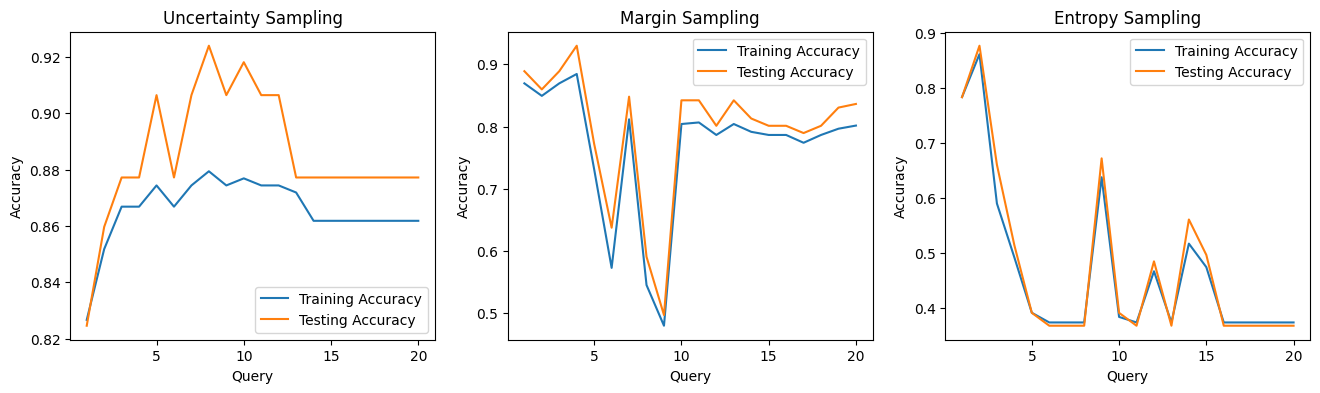

In [5]:


# load the breast cancer dataset
breast_cancer = load_breast_cancer()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

# set up the initial training data
n_initial = 5
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]

# initialize the learner and the query strategies
classifier = SVC(probability=True)
query_strategies = [uncertainty_sampling, margin_sampling, entropy_sampling]
learners = [ActiveLearner(estimator=classifier, X_training=X_initial, y_training=y_initial, query_strategy=strategy) 
            for strategy in query_strategies]

# set the number of queries
n_queries = 20

# initialize the lists to store the accuracies for each query and strategy
acc_train = [[] for _ in query_strategies]
acc_test = [[] for _ in query_strategies]

# run the active learning loop
for idx in range(n_queries):

    for i, learner in enumerate(learners):
        
        # query the unlabeled data
        query_idx, _ = learner.query(X_train)

        # get the corresponding samples
        X_pool, y_pool = X_train[query_idx], y_train[query_idx]

        # teach the learner with the selected samples
        learner.teach(X_pool, y_pool)

        # calculate and store the accuracies for each strategy
        acc_train[i].append(accuracy_score(learner.predict(X_train), y_train))
        acc_test[i].append(accuracy_score(learner.predict(X_test), y_test))
        
        # Print training and testing accuracies for each query
        train_accuracy = accuracy_score(learner.predict(X_train), y_train)
        test_accuracy = accuracy_score(learner.predict(X_test), y_test)
        print(f"Strategy {i+1}, Query {idx+1} - Training Accuracy: {train_accuracy:.3f} - Testing Accuracy: {test_accuracy:.3f}")

import matplotlib.pyplot as plt

# plot the training and testing accuracy for each query and strategy
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].set_title('Uncertainty Sampling')
ax[1].set_title('Margin Sampling')
ax[2].set_title('Entropy Sampling')

for i in range(3):
    ax[i].plot(range(1, n_queries+1), acc_train[i], label='Training Accuracy')
    ax[i].plot(range(1, n_queries+1), acc_test[i], label='Testing Accuracy')
    ax[i].set_xlabel('Query')
    ax[i].set_ylabel('Accuracy')
    ax[i].legend()
    
plt.show()

